# Usando Redes Pré-treinadas

Nesta aula, vamos ver como resolver problemas de classificação, quando temos poucos dados. Esta é uma situação muito comum, de fato. Neste caso, podemos usar os pesos aprendidos em uma rede complexa como ponto inicial de nosso treino. Este é um tipo especial de refinamento com redes neurais conhecido como _transferência de aprendizagem_ (TA).

Nesta aula, em particular, vamos usar um dos modelos pré-treinados já disponibilizados pelo Keras, a InceptionV3.

## Usando InceptionV3

Entre os vários modelos disponíveis em keras.applications, vamos usar a Inception V3. 

In [34]:
# from keras.applications.inception_v3 import InceptionV3

import tensorflow as tf


import keras.applications.inception_v3 as iv3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Para evitar ter que baixar o modelo pela Internet, vamos modificar os paths originais usados na implementação do Keras. No lugar deles, vamos usar cópias dos modelos na rede local.

In [2]:
print(iv3.WEIGHTS_PATH)
print(iv3.WEIGHTS_PATH_NO_TOP)

AttributeError: module 'keras.applications.inception_v3' has no attribute 'WEIGHTS_PATH'

In [ ]:
iv3.WEIGHTS_PATH = 'http://papaleguas.icomp.ufam.edu.br/~marco/downloads/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
iv3.WEIGHTS_PATH_NO_TOP = 'http://papaleguas.icomp.ufam.edu.br/~marco/downloads/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


iv3.WEIGHTS_PATH = 'data/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
iv3.WEIGHTS_PATH_NO_TOP = 'data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [8]:
# create the base pre-trained model -- requires h5py package (pip install h5py, if necessary)
base_model = iv3.InceptionV3(weights='imagenet')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def reset_graph(seed = 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def plot_colorfigs(lst, max_cols = 5):
    'Exibe figuras coloridas em lista lst.'
    if len(lst) == 1:
        plt.imshow(lst[0], interpolation = 'nearest')
        plt.axis = 'off'
    else:
        chunks = [lst[c:c+max_cols] for c in range(0, len(lst), max_cols)]
        for ch in chunks:
            f, axes = plt.subplots(1, len(ch))
            for i, a in enumerate(axes):
                a.imshow(ch[i], interpolation = 'nearest')
                a.set(aspect = 'equal')
                a.set_axis_off()

### Distinguindo cães de gatos

Nesta aula, vamos usar uma coleção de imagens de cães e gatos. A coleção original tem 25 mil fotos. Destas, vamos usar 1000 fotos de cães e 1000 de gatos como conjunto de treino, além de 400 fotos de cada espécie, como validação. 

Esta coleção (a original) tem uma importância histórica, uma vez que uma pesquisa feita há muitos anos com especialistas em visão indicava "que qualquer acurácia acima de 60% não poderia vir sem algum grande avanço no estado da arte" (cf. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html). Por volta de 2014, com o uso de redes de convolução, atingiu-se uma acurácia de 80%, o estado-da-arte de então.

In [ ]:
# No Linux rode isso

dogs_cats = !find data/dogs_and_cats -name '*.jpg'
dogs_cats[:5]


In [5]:
# No Windows, o find nao funcionou no Anaconda, entao use isso

with open("dogsandcats.txt") as f:
    dogs_cats = [l.rstrip('\n') for l in f]
    
dogs_cats[:5]

['data/dogs_and_cats/train/cats/cat.9099.jpg',
 'data/dogs_and_cats/train/cats/cat.91.jpg',
 'data/dogs_and_cats/train/cats/cat.910.jpg',
 'data/dogs_and_cats/train/cats/cat.9100.jpg',
 'data/dogs_and_cats/train/cats/cat.9101.jpg']

Abaixo, temos um exemplo aleatório de imagem nessa coleção.

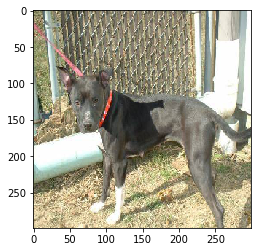

In [6]:
# uma imagem para classificar
import random
img_path = dogs_cats[random.randint(0, len(dogs_cats)-1)]
img = image.load_img(img_path, target_size=(299, 299))
plot_colorfigs([img])

### Classificando Imagens

A seguir, usamos a rede InceptionV3 para classificar essa imagem.

In [7]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # insert a new dimension to x

# pre-preccess intput to be compatible with InceptionV3 images
x = iv3.preprocess_input(x)

preds = base_model.predict(x)
print('Class:', iv3.decode_predictions(preds))

NameError: name 'base_model' is not defined

### Extraindo features de camadas

Outra tarefa comum com uma rede pré-treinada é extrair features de alguma das suas camadas (obter uma representação da entrada naquela camada). A seguir listamos todas as camadas na Inception V3:

In [9]:
# vendo camadas
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [10]:
# extract features from avg_pool layer:
model_at_layer = Model(inputs=base_model.input, 
                       outputs=base_model.get_layer('avg_pool').output)

# process image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = iv3.preprocess_input(x)

# get features
features = model_at_layer.predict(x)
print('Features:', features.shape, features)

Features: (1, 2048) [[0.47810766 0.5316165  0.09599585 ... 0.21966955 1.2393217  0.06817932]]


Agora vamos verficar a qualidade da representação, para confirmar que a rede fornece representações similares para imagens de conteúdo similar. Para isso, vamos obter as features de 100 imagens aleatórias de nossa coleção.

In [11]:
# obtendo os vizinhos mais proximos de 100 figuras aleatorias
dogs_cats100 = random.sample(dogs_cats, 100)

features = []
for img_path in dogs_cats100:
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = iv3.preprocess_input(x)
    features += [model_at_layer.predict(x)]

Note que nesta camada, as representações tem 2048 dimensões. Vamos indexá-las para ser possível usar um algoritmo de vizinhança. Para tanto, vamos mudar a dimensão de cada representação para ser um vetor linha em vez de um vetor coluna:

In [ ]:
for i in range(len(features)):
    features[i] = features[i].reshape((2048,))

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(2)
neigh.fit(features) 

Finalmente, podemos obter as imagens mais similares a qualquer uma tomada aleatoriamente. Como esperado, os vizinhos mais próximos são normalmente imagens de conteúdo similar.

In [ ]:
rquery = random.randint(0, 99)
indices = neigh.kneighbors([features[rquery]], 3, return_distance=False)
plot_colorfigs([image.load_img(dogs_cats100[i], target_size=(299, 299)) for i in indices[0]])

### Vendo ativações

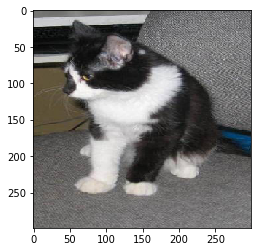

In [17]:
# uma imagem de teste
img_path = dogs_cats[6]
img = image.load_img(img_path, target_size=(299, 299))
plot_colorfigs([img])

In [18]:
layer_outputs = [layer.output for layer in base_model.layers[:30]]

In [19]:
act_model = Model(inputs = base_model.inputs, outputs = layer_outputs)

In [20]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 
x = iv3.preprocess_input(x)
acts = act_model.predict(x)

InvalidArgumentError: input_1:0 is both fed and fetched.

In [21]:
lacts = acts[3]

NameError: name 'acts' is not defined

In [22]:
lacts.shape

NameError: name 'lacts' is not defined

In [23]:
layermaps = [lacts[0, :, :, m] for m in range(lacts.shape[3])]

NameError: name 'lacts' is not defined

In [24]:
plot_colorfigs(layermaps, max_cols = 4)

NameError: name 'layermaps' is not defined

### Retreinando Inception v3 para um novo conjunto de classes

Agora, vamos treinar a rede para prever _gatos x cães_ em lugar das 1000 classes da Imaginet. Para tanto, vamos ler de novo a InceptionV3, desta vez sem as camadas do topo (o classificador no topo da rede de convolução).

In [25]:
# tamanho das imagens
img_width, img_height = 150, 150

train_data_dir = 'data/dogs_and_cats/train' 
validation_data_dir = 'data/dogs_and_cats/validation' 

# criando o modelo base pre treinado
base_model = iv3.InceptionV3(weights='imagenet', include_top=False)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000018D11DBBB70>>
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\tensorflow\python\client\session.py", line 1398, in __del__
    self._session._session, self._handle, status)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 519, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 1713919091808
Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000018EEB2B87B8>>
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\tensorflow\python\client\session.py", line 1398, in __del__
    self._session._session, self._handle, status)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\framework\errors_i

87916544/87910968 [==============================] - 59s 1us/step


#### Adicione uma rede de classificação no topo da Inception

No topo da nossa rede, vamos colocar uma rede totalmente conectada para classificar as imagens. Para isso vamos transformar as features de saída da InceptionV3 em 1024 entradas para uma rede softmax. 

In [26]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

#### Congele todas as camadas, exceto as que foram adicionadas agora

Todas as camadas da InceptionV3 serão congeladas de forma que os seus pesos não serão modificados no treino. Apenas os pesos da nossa rede de topo serão modificados. 

In [27]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Prepare os conjuntos de treino e teste, gerando novas imagens se possível

Nesta fase, vamos gerar os conjuntos de treino e teste. Note que é uma boa oportunidade para gerar casos de treino com ruído para tornar a rede mais robusta. 

Esta técnica é chamada de _data augmentation_ e pode ser feita pelo Keras usando a classe _ImageDataGenerator_. Abaixo, temos exemplos de transformações que podem ser realizadas:

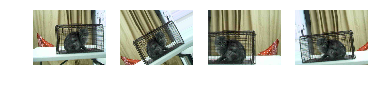

In [29]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image

datagen = ImageDataGenerator(
        rotation_range=40,       # image rotation (degrees)
        width_shift_range=0.2,   # width-% range for image translation 
        height_shift_range=0.2,  # height-% range for image translation 
        shear_range=0.2,         # cf https://en.wikipedia.org/wiki/Shear_mapping
        zoom_range=0.2,          # zoom
        horizontal_flip=True,    # mirroring effect
        fill_mode='nearest')     # how to fill gaps resulting from other transformations

img = load_img(dogs_cats[random.randint(0, len(dogs_cats)-1)])
x = img_to_array(img)

figs = [img]
figs += [array_to_img(datagen.random_transform(x)) for i in range(3)]
plot_colorfigs(figs)    

Note que o método ImageDataGenerator.flow() pode ser usado para gerar continuamente batches de imagens transformadas.

In [30]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255)#,
#        rotation_range=40,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True,
#        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


#### Treine o novo modelo

O novo modelo pode ser então treinado.

In [32]:
print("start history model")
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50, # 50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

start history model
Epoch 1/50
125/125 [==============================] - 31s 248ms/step - loss: 0.9836 - acc: 0.6955 - val_loss: 0.3741 - val_acc: 0.9300
Epoch 2/50
125/125 [==============================] - 9s 70ms/step - loss: 0.5177 - acc: 0.7605 - val_loss: 0.6572 - val_acc: 0.8525
Epoch 3/50
125/125 [==============================] - 9s 71ms/step - loss: 0.4879 - acc: 0.7765 - val_loss: 0.3313 - val_acc: 0.9337
Epoch 4/50
125/125 [==============================] - 9s 72ms/step - loss: 0.4495 - acc: 0.8005 - val_loss: 0.5378 - val_acc: 0.9350
Epoch 5/50
125/125 [==============================] - 9s 70ms/step - loss: 0.4237 - acc: 0.8200 - val_loss: 0.4010 - val_acc: 0.9337
Epoch 6/50
125/125 [==============================] - 9s 70ms/step - loss: 0.3959 - acc: 0.8255 - val_loss: 0.4971 - val_acc: 0.9313
Epoch 7/50
125/125 [==============================] - 9s 71ms/step - loss: 0.3619 - acc: 0.8335 - val_loss: 0.9870 - val_acc: 0.8488
Epoch 8/50
125/125 [===========================

In [33]:
model.save_weights('/tmp/first_try_top.h5')

#### Agora refine a rede global, treinando uma parte da Inception original junto com as novas camadas adicionadas

Ao fim do processo anterior, já temos o topo da nossa rede de convolução treinada para o problema de discriminação entre cães e gatos. Podemos, agora, refinar o modelos retreinando algumas camadas de convolução da rede. Assim, vamos congelar as N camadas mais do fundo e deixar treinar as camadas mais perto do topo:

In [ ]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics = ['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

In [ ]:
model.save_weights('/tmp/first_try_conv.h5')

E agora temos a rede treinada. 

Da forma como fizemos, ela não vai alcançar um grande resultado. Mas com a inclusão de mais imagens por _data augmentation_, uso de regularizadores junto com o descongelamento de mais algumas camadas, é possível atingir uma precisão em torno de 95%.

## Resumo sobre transferência de aprendizagem

Entre os vários fatores importantes para TA, dois a considerar são o tamanho da base a treinar (base nova -- BN) e a similaridade com a base treinada (base original -- BO). Supondo que as duas bases foram criadas para tarefas similares (ex: classificação de imagens naturais), temos quatro cenários:

* __BO >> BN com conteudo similar__: se a BN é pequena, o _tuning_ de parâmetros pode levar a _overfitting_. Como elas são similares, os atributos de alto nível da BO servem para a BN. Logo, é melhor treinar um classificador linear nos atributos (de alto nível) aprendidos pela BO. Em suma, _use_ CNN(BO) _como codificador para_ BN.

* __BO $\gtrsim$ BN com conteúdo similar__: comece com pesos da BO e depois de treinar BN, faça tuning dos parâmetros. Fizemos isso nesta aula. Note que, em particular, isso não foi um grande problema nesta aula porque a nossa BN é sobre um conteúdo (cães x gatos) coberto, de certa forma, pela BO, já que a Imagenet inclui raças de cães e gatos entre seus alvos.

* __BO >> BN com conteúdo distinto__: treine um classificador linear usando atributos de baixo nível da BO.

* __BO $\gtrsim$ BN com conteúdo distinto__: use os pesos aprendidos para BO (partir de uma rede pre-treinada pode ser sempre útil), treine uma CNN para BN e faça tuning de todos os parâmetros da arquitetura.

Esta aula foi baseada no livro de François Chollet e na sua aula disponível em https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html; também foi usado material de Edward Tufte, disponível em http://blog.revolutionanalytics.com/2016/08/deep-learning-part-2.html.